# Import Necessary Libraries

In [32]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import os 

from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Prepare dataset

In [33]:
def getFileInfo(pwd):
    files = os.listdir(pwd)
    print("CURRENT PATH : ",pwd)
    if files != []:
        print("\nFiles:\n")
        for file in files:
            print(file)
    else:
        raise Exception("There is no file in the current directory, upload a file or change directory")

In [ ]:
pwd = os.getcwd()
os.chdir(pwd)
getFileInfo(pwd)

In [35]:
dataset_path = pwd+'\dataset'
getFileInfo(dataset_path)

CURRENT PATH :  C:\Users\umtsr\Desktop\2021-İlkbahar\DOSYALAR\Intro2ML\141180059_Sarıöz_Ümit_CENG476_Spring2021_Midterm\141180059_Ceng476_Midterm\dataset

Files:

car.c45-names
car.data
car.names


In [36]:
c45_names_path = dataset_path+ '/car.c45-names'
data_path = dataset_path + '/car.data'
names_path = dataset_path + '/car.names'

with open(c45_names_path,'r') as f :
    lines_c45 = f.read().split('\n')

with open(names_path,'r') as f:
    lines_names  = f.read().split('\n')
    
with open(data_path,'r') as f :
    lines_data = f.read().split('\n')

In [37]:
lines_names

['1. Title: Car Evaluation Database',
 '',
 '2. Sources:',
 '   (a) Creator: Marko Bohanec',
 '   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)',
 '               Blaz Zupan      (blaz.zupan@ijs.si)',
 '   (c) Date: June, 1997',
 '',
 '3. Past Usage:',
 '',
 '   The hierarchical decision model, from which this dataset is',
 '   derived, was first presented in ',
 '',
 '   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for',
 '   multi-attribute decision making. In 8th Intl Workshop on Expert',
 '   Systems and their Applications, Avignon, France. pages 59-78, 1988.',
 '',
 '   Within machine-learning, this dataset was used for the evaluation',
 '   of HINT (Hierarchy INduction Tool), which was proved to be able to',
 '   completely reconstruct the original hierarchical model. This,',
 '   together with a comparison with C4.5, is presented in',
 '',
 '   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by',
 '   function decomposition. ICML-97, Nashvi

In [38]:
lines_c45

['| names file (C4.5 format) for car evaluation domain',
 '',
 '| class values',
 '',
 'unacc, acc, good, vgood',
 '',
 '| attributes',
 '',
 'buying:   vhigh, high, med, low.',
 'maint:    vhigh, high, med, low.',
 'doors:    2, 3, 4, 5more.',
 'persons:  2, 4, more.',
 'lug_boot: small, med, big.',
 'safety:   low, med, high.',
 '']

### <b><u> Description </u></b>

Consider that you are willing to buy a car and you have collected information having four attributes ‘price’, ‘maintenance’, ‘capacity’ and ‘airbag’, and are trying to predict whether a given car is ‘profitable’ or not. Assume all the four attributes are categorical, with discrete values.

#### <b><u> Attributes </u></b>

We will use the attributes: ‘buying buying price (buying)’, ‘maint price of the maintenance (maint)’, ‘persons capacity in terms of persons to carry’(persons), and ‘safety estimated safety of the car’ (safety).

#### <b><u> Classes </u></b>

 CAR car acceptability class values are: unacc, acc, good, vgood, we will be using a new label ‘profitable’, basically, if CAR car acceptability is unacc, the ‘profitable’ class is negative (unprofitable) and otherwise (acc, good, vgood), the ‘profitable’ class is positive (profitable).

In [39]:
def getAttrib(data):
    '''
    lines_c45 dosyasını incelediğime göre 8-13 indeksleri attrib isimlerimiz. Bunları bir listeye alıyorum.
    Input : lines_c45 file .
    Output: return attributes' names 
    '''
    return data.split(':')[0]

attribs = []

for i in range(8,14):
    attrib = getAttrib(lines_c45[i])
    attribs.append(attrib)
attribs.append('profitable') # add class name(profitable) to attribs list
print("Attributes:",attribs)



Attributes: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'profitable']


In [40]:
lines_data[0]

'vhigh,vhigh,2,2,small,low,unacc'

In [41]:
dataset = []
for datapoint in lines_data:
    datas = datapoint.split(',')
    dataset.append(datas)

In [42]:
df_data = pd.DataFrame(dataset,columns=attribs).dropna()

In [43]:
df_data

,buying,maint,doors,persons,lug_boot,safety,profitable
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [44]:
data_len = len(df_data)
for index in range(data_len):
    label = df_data.profitable[index]
    if label == 'unacc':
        df_data.profitable[index] =  'unprofitable'
    else:
        df_data.profitable[index] =  'profitable'


In [45]:
df_data

,buying,maint,doors,persons,lug_boot,safety,profitable
0,vhigh,vhigh,2,2,small,low,unprofitable
1,vhigh,vhigh,2,2,small,med,unprofitable
2,vhigh,vhigh,2,2,small,high,unprofitable
3,vhigh,vhigh,2,2,med,low,unprofitable
4,vhigh,vhigh,2,2,med,med,unprofitable
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,profitable
1724,low,low,5more,more,med,high,profitable
1725,low,low,5more,more,big,low,unprofitable
1726,low,low,5more,more,big,med,profitable


In [46]:
df_data.drop(columns=['doors','lug_boot'],axis=1,inplace=True)

In [47]:
df_data

,buying,maint,persons,safety,profitable
0,vhigh,vhigh,2,low,unprofitable
1,vhigh,vhigh,2,med,unprofitable
2,vhigh,vhigh,2,high,unprofitable
3,vhigh,vhigh,2,low,unprofitable
4,vhigh,vhigh,2,med,unprofitable
...,...,...,...,...,...
1723,low,low,more,med,profitable
1724,low,low,more,high,profitable
1725,low,low,more,low,unprofitable
1726,low,low,more,med,profitable


In [48]:
df_data.to_csv('car_relabeled.csv',index=False)

# PART A : Decision Tree Algorithm from Scratch

In [49]:
dataset = pd.read_csv('car_relabeled.csv')
print("shape:",dataset.shape)
dataset.tail()

shape: (1728, 5)


,buying,maint,persons,safety,profitable
1723,low,low,more,med,profitable
1724,low,low,more,high,profitable
1725,low,low,more,low,unprofitable
1726,low,low,more,med,profitable
1727,low,low,more,high,profitable


# Helper Functions 

- isLeafNode -> Decide whether node is leaf node ? 
- Classify -> Define class of feature - decide wheth is profitable or not .
- find potential splits -> Find potential splits (names of possible cases)
- split dataset -> split values as left sub tree and right sub tree 
- calculate information gain 
- calculate gini score
- predict one sample 
- accuracy calculator


## 1. Information Gain

In [50]:
def splitDataset(dataset,verbose=False):
    '''
    This function can split dataset as 4:1 ratio , and return train,test dataframes.
    '''
    X,y = dataset.iloc[:,:-1],dataset.iloc[:,-1] 
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state = 0 )
    train = pd.concat((X_train,y_train),axis=1)
    test = pd.concat((X_test,y_test),axis=1)
    if verbose == True:
        print("Split is succeed.")
        print(f"Train.shape:{train.shape}\tTest.shape:{test.shape}")
    return train,test

In [51]:
train,test = splitDataset(dataset,True)
train.tail()

Split is succeed.
Train.shape:(1382, 5)	Test.shape:(346, 5)


,buying,maint,persons,safety,profitable
835,high,low,more,med,profitable
1216,med,low,2,med,unprofitable
1653,low,low,2,low,unprofitable
559,high,high,more,med,unprofitable
684,high,med,4,low,unprofitable


### 1.1. isLeaf node ? 

In [52]:
def isLeafNode(data,verbose=False):
    '''
    Input : data is equals to a 2D numpy array which contains all values.
    Return a boolean result which if tree is pure(length of tree is equal to 1) True so it's leaf node, else False.
    '''
    unique_labels = np.unique(data[:,-1])
    if len(unique_labels) == 1:
        if verbose:
            print(f"TRUE : Tree is NOT dividable, it is leafnode.")
        return True
    else:
        if verbose:
            print(f"FALSE : Tree is dividable ! It's NOT leafnode.")
        return False

In [53]:
isLeafNode(train[train.profitable == 'profitable'].values,True)

TRUE : Tree is NOT dividable, it is leafnode.


True

### 1.2. Classify Data as Majority

In [54]:
def classify_as_majority(data):
    '''
    Inputs: data, is a 2D numpy array which contains all values
    Outputs: Return 'label' is represents class which has majority.
    '''
    values = data[:,-1]
    names,counts = np.unique(values,return_counts=True)
    max_index = counts.argmax()
    label = names[max_index]
    return label

In [55]:
classify_as_majority(train[train.buying=='low'].values)

'unprofitable'

### 1.3. Find Potential Splits

In [56]:
def findPotentialSplits(data,verbose=False):
    '''
    Inputs : data -> It's a 2D numpy array which contains all dataframe values.
    Output: return a dict which has potential splits [column_name:potential_splits(unique values)]
    '''
    potential_splits = {}
    for index in range(data.shape[1]-1):
        vals = data[:,index]
        unique_vals = np.unique(vals)
        #potential_splits[index] = []
        potential_splits[index] = unique_vals
    if verbose:
        print("Potential Splits:\n",potential_splits)
    return potential_splits

In [57]:
potential_splits = findPotentialSplits(train.values,verbose=True)

Potential Splits:
 {0: array(['high', 'low', 'med', 'vhigh'], dtype=object), 1: array(['high', 'low', 'med', 'vhigh'], dtype=object), 2: array(['2', '4', 'more'], dtype=object), 3: array(['high', 'low', 'med'], dtype=object)}


### 1.4. Split Data by looking Potential Splits

In [58]:
def splitData(data,col,val,verbose=False):
    '''
    Inputs: data -> is a 2D Numpy array
            col -> Column index to split 
            val -> condition value to split
    Outputs: 
            return left subtree and right sub tree
            If condition is true, then return left sub tree else return right sub tree
    '''
    splitting_col = data[:,col]
    left,right=data[ splitting_col == val ], data[splitting_col != val]
    if verbose:
        print(f"Case of COLUMN: {col} and CONDITION= {val} -> Split data is succeed !")
    return left,right

In [59]:
left,right = splitData(train.values,1,'low',True)

Case of COLUMN: 1 and CONDITION= low -> Split data is succeed !


### Core of Information Gain-1
### 1.5. Entropy 

p = olasılık 

p+ * log2(p+)   +     p- * log2(p-) 

In [60]:
def calculateEntropy(data,verbose=False):
    '''
    Inputs : data -> is a 2D numpy array which contains only label values.
    Return entropy 
    '''
    labels = data[:,-1]
    unique_labels,counts = np.unique(labels,return_counts=True) # Counts-> [profitable_counts(yes) , unprofitable_counts(no)]
    total = counts.sum()
    probs = counts / total
    entropy = (probs*np.log2(probs)).sum()
    if verbose:
        print(f"Total Count:{total}\nProbabilities\nProfitable:{probs[0]}\tUnprofitable:{probs[1]}\nEntropy:{-entropy}")
    return -entropy

In [61]:
entropy = calculateEntropy(left,True)

Total Count:361
Probabilities
Profitable:0.3850415512465374	Unprofitable:0.6149584487534626
Entropy:0.9615250229029852


### Core of Information Gain-2
### 1.6. Information

In [62]:
def calculateAllEntropy(left,right,verbose=False):
    '''
    Inputs: left -> is a 2D numpy array which has left sub_tree values
            right -> is a 2D numpy array which has right sub_tree values
    Return information by being probabilities
    '''
    total = len(left) + len(right)
    prob_left = len(left) / total
    prob_right = len(right) / total
    information = prob_left * calculateEntropy(left) + prob_right * calculateEntropy(right)
    
    if verbose:
        print(f"PROBABILITIES\nLeft:{prob_left}\tRight:{prob_right}\nInformation:{information}")
    return information

In [63]:
information = calculateAllEntropy(left,right,True)

PROBABILITIES
Left:0.26121562952243127	Right:0.7387843704775687
Information:0.870035483970435


### Core of Information Gain-3 and Gini Score -3 
### 1.7. Find Best Split Values

In [64]:
def findBestSplit(data,potential_splits,method='information_gain',verbose=False):
    '''
    Inputs: data -> is a 2D numpy array
            potential_splits -> a dict object which has potential column indices and values.
            method -> Options: 'information_gain' or 'gini'. If method is not define, standart method is information gain. If method is equals to gini, tree splitted by calculating gini score.
    Returns : best column indice and best  value 
    '''

    information = np.inf
    gini_score = np.inf
    best_col = ''
    best_val = ''
    for col in potential_splits:
        for val in potential_splits[col]:
            left,right = splitData(data,col,val,False)
            if method == 'information_gain':
                current_entropy = calculateAllEntropy(left,right,False)

                if current_entropy <= information:
                    information = current_entropy
                    best_col = col
                    best_val = val
                if verbose:
                    print(f"\nInformation:{information}\tBest Column:{best_col}\tBest Value:{best_val}\n")
            elif method == 'gini':
                current_gini = calculateAllGini(left,right,False)
                
                if current_gini <= gini_score:
                    gini_score = current_gini
                    best_col = col
                    best_val = val 
                if verbose:
                    print(f"\nGini Score:{gini_score}\tBest Column:{best_col}\tBest Value:{best_val}\n")
    return best_col, best_val

In [65]:
best_col,best_val = findBestSplit(train.values,potential_splits,True)

### 1.8. Decision Tree Algorithm

In [66]:
def decisionTree_scratch(dataset,depth=0,min_sample=2,max_depth=5,method='information_gain',verbose=False,show=False):
    '''
    Dataset -> is a pandas dataframe
    Depth -> initial depth of decision tree
    min-sample -> minimum sample size of dataset 
    
    Return sub_tree or 
    '''
    # Be sure dataset is a 2D numpy array because of other functions need to a 2D numpy array to input 
    if depth == 0:
        global COLUMNS
        COLUMNS = dataset.columns
        data = dataset.values
    else:
        data = dataset
        
    # base case 
    if isLeafNode(data) or len(data) <= min_sample or depth == max_depth:
        return classify_as_majority(data)
    
    ## recursive part
    else:
        depth += 1
        
        #helper functions 
        potential_splits = findPotentialSplits(data,False)
        col,val = findBestSplit(data,potential_splits,method=method,verbose=False)
        left,right = splitData(data,col,val,False)
        
        # check one of trees are done ? 
        if len(left)==0 or len(right) == 0:
            return classify_as_majority(data)
        
        question = f"{COLUMNS[col]} = {val}"
        sub_tree = {question:[]}
        
        # find answers 
        yes = decisionTree_scratch(left,depth,min_sample,max_depth,method)
        no = decisionTree_scratch(right,depth,min_sample,max_depth,method)
        
        if yes == no:
            sub_tree = yes
        else:
            sub_tree[question].append(yes)
            sub_tree[question].append(no)
        if show:
            pprint(sub_tree,width=30)
        return sub_tree

In [67]:
decision_tree_infoGain = decisionTree_scratch(train,max_depth=3,method='information_gain',show=True)

{'safety = low': ['unprofitable',
                  {'persons = 2': ['unprofitable',
                                   {'buying = vhigh': ['unprofitable',
                                                       'profitable']}]}]}


### 1.9. Classification

In [68]:
def predict(sample,tree):
    '''
    Inputs:
    sample is a pandas series from a test dataset frame
    tree is our decision tree structure
    Return:
    prediction.
    '''
    question = list(tree.keys())[0] # get question 
    feature_name, question_type, value = question.split()
    
    # find answer
    if sample[feature_name] == value:
        answer= tree[question][0]
    else:
        answer = tree[question][1]
        
    # check answer is finite or not 
    if isinstance(answer,str):
        return answer
    else: 
        sub_tree = answer
        return predict(sample,sub_tree)

In [69]:
sample = test.iloc[2]
sample

buying                high
maint                  med
persons                  2
safety                 low
profitable    unprofitable
Name: 648, dtype: object

In [70]:
predict(sample,decision_tree_infoGain)

'unprofitable'

### 1.10. Calculate Accuracy 

In [71]:
def accuracy(dataset,tree,verbose=False):
    predictions = [predict(dataset.iloc[row],tree) for row in range(len(dataset))]
    col = dataset.columns[-1]
    results = (dataset[col] == predictions)
    result,counts = np.unique(results,return_counts=True)
    accuracy = counts[1] / counts.sum()
    
    if verbose:
        print(f"False Prediction : {counts[0]}\nTrue Prediction : {counts[1]}\nAccuracy:{accuracy}")
    return accuracy

In [72]:
acc_infoGain = accuracy(test,decision_tree_infoGain,True)

False Prediction : 47
True Prediction : 299
Accuracy:0.8641618497109826


## 2. Gini Index

- splitData(data,col,values) --> split data as left_subtree and right_subtree
- findPotentialSplits(data) --> Potential split groups as dict (group_index : condition)
- calculate gini indeks score --> min score is best split

In [73]:
def calculateGiniScore(data,verbose=False):
    '''
    Inputs : data -> is a 2D numpy array which contains only label values.
    Return: gini_score 
    '''
    labels = data[:,-1]
    unique_labels,counts = np.unique(labels,return_counts=True) # Counts-> [profitable_counts(yes) , unprofitable_counts(no)]
    total = counts.sum()
    probs = counts / total
    gini_score = (probs**2).sum()
    
    if verbose:
        print(f"Total Count:{total}\nProbabilities\nProfitable:{probs[0]}\tUnprofitable:{probs[1]}\n Gini Score:{1-gini_score}")
    return (1-gini_score)

In [74]:
gini_score_right = calculateGiniScore(right,verbose=True)
print("\nLEFT\n")
gini_score_left = calculateGiniScore(left,verbose=True)

Total Count:1021
Probabilities
Profitable:0.267384916748286	Unprofitable:0.732615083251714
 Gini Score:0.39178044608759643

LEFT

Total Count:361
Probabilities
Profitable:0.3850415512465374	Unprofitable:0.6149584487534626
 Gini Score:0.47356911012039504


In [75]:
def calculateAllGini(left,right,verbose=False):
    '''
    Inputs: left -> is a 2D numpy array which has left sub_tree values
            right -> is a 2D numpy array which has right sub_tree values
    Return information by being probabilities
    '''
    total = len(left) + len(right)
    prob_left = len(left) / total
    prob_right = len(right) / total
    final_gini_score = prob_left * calculateGiniScore(left) + prob_right * calculateGiniScore(right)
    
    if verbose:
        print(f"PROBABILITIES\nLeft:{prob_left}\tRight:{prob_right}\nGini Score(weighted):{final_gini_score}")
    return final_gini_score

In [76]:
weighted_gini_score = calculateAllGini(left,right,verbose=True)

PROBABILITIES
Left:0.26121562952243127	Right:0.7387843704775687
Gini Score(weighted):0.41314492345072257


In [77]:
decision_tree_gini = decisionTree_scratch(train,max_depth=4,method='gini',show=True)

{'safety = low': ['unprofitable',
                  {'persons = 2': ['unprofitable',
                                   {'buying = vhigh': [{'maint = low': ['profitable',
                                                                        'unprofitable']},
                                                       'profitable']}]}]}


In [78]:
sample = test.iloc[2]
sample

buying                high
maint                  med
persons                  2
safety                 low
profitable    unprofitable
Name: 648, dtype: object

In [79]:
predict(sample,decision_tree_gini)

'unprofitable'

In [80]:
acc_gini = accuracy(test,decision_tree_gini,True)

False Prediction : 44
True Prediction : 302
Accuracy:0.8728323699421965


# ALL CODES:Part A - Create a classifier..

In [81]:
class decisionTreeClassifier:
    def __init__(self,depth=0,min_sample=2,max_depth=5,method='information_gain',verbose=True):
        self.depth = depth
        self.min_sample = min_sample
        self.max_depth = max_depth
        self.method = method 
        print(f'Decision Tree Classifier:[ Depth={depth},Min_sample_size={min_sample},Max_depth={max_depth},Method={method} ] ')
        
    def isLeafNode(self,data,verbose=False):
        '''
        Input : data is equals to a 2D numpy array which contains all values.
        Return a boolean result which if tree is pure(length of tree is equal to 1) True so it's leaf node, else False.
        '''
        unique_labels = np.unique(data[:,-1])
        if len(unique_labels) == 1:
            if verbose:
                print(f"TRUE : Tree is NOT dividable, it is Pure.")
            return True
        else:
            if verbose:
                print(f"FALSE : Tree is dividable ! It's NOT Pure.")
            return False

    def classify_as_majority(self,data):
        '''
        Inputs: data, is a 2D numpy array which contains all values
        Outputs: Return 'label' is represents class which has majority.
        '''
        values = data[:,-1]
        names,counts = np.unique(values,return_counts=True)
        max_index = counts.argmax()
        label = names[max_index]
        return label

    def findPotentialSplits(self,data,verbose=False):
        '''
        Inputs : data -> It's a 2D numpy array which contains all dataframe values.
        Output: return a dict which has potential splits [column_name:potential_splits(unique values)]
        '''
        potential_splits = {}
        for index in range(data.shape[1]-1):
            vals = data[:,index]
            unique_vals = np.unique(vals)
            potential_splits[index] = []
            potential_splits[index] = unique_vals
        if verbose:
            print("Potential Splits:\n",potential_splits)
        return potential_splits

    def splitData(self,data,col,val,verbose=False):
        '''
        Inputs: data -> is a 2D Numpy array
                col -> Column index to split 
                val -> condition value to split
        Outputs: 
                return left subtree and right sub tree
                If condition is true, then return left sub tree else return right sub tree
        '''
        splitting_col = data[:,col]
        left,right=data[ splitting_col == val ], data[splitting_col != val]
        if verbose:
            print(f"Case of COLUMN: {col} and CONDITION= {val} -> Split data is succeed !")
        return left,right

    def calculateEntropy(self,data,verbose=False):
        '''
        Inputs : data -> is a 2D numpy array which contains only label values.
        Return entropy 
        '''
        labels = data[:,-1]
        unique_labels,counts = np.unique(labels,return_counts=True) # Counts-> [profitable_counts(yes) , unprofitable_counts(no)]
        total = counts.sum()
        probs = counts / total
        entropy = (probs*np.log2(probs)).sum()
        if verbose:
            print(f"Total Count:{total}\nProbabilities\nProfitable:{probs[0]}\tUnprofitable:{probs[1]}\nEntropy:{-entropy}")
        return -entropy

    def calculateAllEntropy(self,left,right,verbose=False):
        '''
        Inputs: left -> is a 2D numpy array which has left sub_tree values
                right -> is a 2D numpy array which has right sub_tree values
        Return information by being probabilities
        '''
        total = len(left) + len(right)
        prob_left = len(left) / total
        prob_right = len(right) / total
        information = prob_left * self.calculateEntropy(left) + prob_right * self.calculateEntropy(right)

        if verbose:
            print(f"PROBABILITIES\nLeft:{prob_left}\tRight:{prob_right}\nInformation:{information}")
        return information


    def findBestSplit(self,data,potential_splits,method='information_gain',verbose=False):
        '''
        Inputs: data -> is a 2D numpy array
                potential_splits -> a dict object which has potential column indices and values.
                method -> Options: 'information_gain' or 'gini'. If method is not define, standart method is information gain. If method is equals to gini, tree splitted by calculating gini score.
        Returns : best column indice and best  value 
        '''

        information = np.inf
        gini_score = np.inf
        best_col = ''
        best_val = ''
        for col in potential_splits:
            for val in potential_splits[col]:
                left,right = self.splitData(data,col,val,False)
                if method == 'information_gain':
                    current_entropy = self.calculateAllEntropy(left,right,False)

                    if current_entropy <= information:
                        information = current_entropy
                        best_col = col
                        best_val = val
                    if verbose:
                        print(f"\nInformation:{information}\tBest Column:{best_col}\tBest Value:{best_val}\n")
                elif method == 'gini':
                    current_gini = self.calculateAllGini(left,right,False)

                    if current_gini <= gini_score:
                        gini_score = current_gini
                        best_col = col
                        best_val = val 
                    if verbose:
                        print(f"\nGini Score:{gini_score}\tBest Column:{best_col}\tBest Value:{best_val}\n")
        return best_col, best_val


    def fit(self,dataset,verbose=False,show=False):
        '''
        This function create decision tree.
        Dataset -> is a pandas dataframe
        Depth -> initial depth of decision tree
        min-sample -> minimum sample size of dataset 

        Return sub_tree or 
        '''
        # Be sure dataset is a 2D numpy array because of other functions need to a 2D numpy array to input 
        if self.depth == 0:
            global COLUMNS
            COLUMNS = dataset.columns
            data = dataset.values
        else:
            data = dataset

        # base case 
        if self.isLeafNode(data) or len(data) <= self.min_sample or self.depth == self.max_depth:
            return self.classify_as_majority(data)

        ## recursive part
        else:
            self.depth += 1

            #helper functions 
            potential_splits = self.findPotentialSplits(data,False)
            col,val = self.findBestSplit(data,potential_splits,method=self.method,verbose=False)
            left,right = self.splitData(data,col,val,False)

            # check one of trees are done ? 
            if len(left)==0 or len(right) == 0:
                return self.classify_as_majority(data)

            question = f"{COLUMNS[col]} = {val}"
            sub_tree = {question:[]}

            # find answers 
            yes = self.fit(left)
            no = self.fit(right)

            if yes == no:
                sub_tree = yes
            else:
                sub_tree[question].append(yes)
                sub_tree[question].append(no)
            if show:
                pprint(sub_tree,width=30)
            return sub_tree
    def showTree(tree):
        print(tree)

    def calculateGiniScore(self,data,verbose=False):
        '''
        Inputs : data -> is a 2D numpy array which contains only label values.
        Return: gini_score 
        '''
        labels = data[:,-1]
        unique_labels,counts = np.unique(labels,return_counts=True) # Counts-> [profitable_counts(yes) , unprofitable_counts(no)]
        total = counts.sum()
        probs = counts / total
        gini_score = (probs**2).sum()

        if verbose:
            print(f"Total Count:{total}\nProbabilities\nProfitable:{probs[0]}\tUnprofitable:{probs[1]}\n Gini Score:{1-gini_score}")
        return (1-gini_score)


    def calculateAllGini(self,left,right,verbose=False):
        '''
        Inputs: left -> is a 2D numpy array which has left sub_tree values
                right -> is a 2D numpy array which has right sub_tree values
        Return information by being probabilities
        '''
        total = len(left) + len(right)
        prob_left = len(left) / total
        prob_right = len(right) / total
        final_gini_score = prob_left * self.calculateGiniScore(left) + prob_right * self.calculateGiniScore(right)

        if verbose:
            print(f"PROBABILITIES\nLeft:{prob_left}\tRight:{prob_right}\nGini Score(weighted):{final_gini_score}")
        return final_gini_score

    def predict(self,sample,tree):
        '''
        Inputs:
        sample is a pandas series from a test dataset frame
        tree is our decision tree structure
        Return:
        prediction.
        '''
        question = list(tree.keys())[0] # get question 
        feature_name, question_type, value = question.split()

        # find answer
        if sample[feature_name] == value:
            answer= tree[question][0]
        else:
            answer = tree[question][1]

        # check answer is finite or not 
        if isinstance(answer,str):
            return answer
        else: 
            sub_tree = answer
            return self.predict(sample,sub_tree)

    def accuracy_calc(self,dataset,tree,verbose=False):
        predictions = [self.predict(dataset.iloc[row],tree) for row in range(len(dataset))]
        col = dataset.columns[-1]
        results = (dataset[col] == predictions)
        result,counts = np.unique(results,return_counts=True)
        accuracy = counts[1] / counts.sum()

        if verbose:
            print(f"False Prediction : {counts[0]}\nTrue Prediction : {counts[1]}\nAccuracy:{accuracy}")
        return accuracy

In [82]:
dataset = pd.read_csv('car_relabeled.csv')
train,test = splitDataset(dataset)

In [83]:
clf = decisionTreeClassifier(max_depth=5,method='gini')

Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=5,Method=gini ] 


In [84]:
my_tree_gini = clf.fit(train,show=True)

{'safety = low': ['unprofitable',
                  {'persons = 2': ['unprofitable',
                                   {'buying = vhigh': [{'maint = low': ['profitable',
                                                                        'unprofitable']},
                                                       'profitable']}]}]}


In [85]:
clf.accuracy_calc(test,my_tree_gini)

0.8728323699421965

# PART B : Decision Tree Algorithm with Scikit-Learn

In [86]:
dataset = pd.concat((train,test),axis=0)
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
y[y=='unprofitable'] = 1 
y[y=='profitable']=0
y_float = y.astype(float)
X_oh = pd.get_dummies(X)

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X_oh,y_float,test_size=.2,random_state=0)
print("X_train.shape",X_train.shape)
print("X_test.shape",X_test.shape)
print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

X_train.shape (1382, 14)
X_test.shape (346, 14)
y_train.shape (1382,)
y_test.shape (346,)


In [88]:
X_train.tail()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,persons_2,persons_4,persons_more,safety_high,safety_low,safety_med
605,1,0,0,0,1,0,0,0,0,1,0,1,0,0
1613,0,1,0,0,0,0,1,0,0,0,1,1,0,0
655,1,0,0,0,0,0,1,0,1,0,0,0,0,1
901,0,0,1,0,0,0,0,1,0,1,0,0,0,1
120,0,0,0,1,1,0,0,0,0,1,0,0,1,0


In [89]:
y_train.tail()

605     0.0
1613    0.0
655     1.0
901     1.0
120     1.0
Name: profitable, dtype: float64

### Create DecisionTreeClassifier Objects by criterion

In [90]:
tree_gain = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
tree_gini = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)

### Fit data using with different tree structures

In [91]:
tree_gain.fit(X_train,y_train)
tree_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [92]:
print("  \t   ACCURACIES\n---------------------------------- ")
print(f"Gain | Train: {tree_gain.score(X_train,y_train):.4f}\t  Test: {tree_gain.score(X_test,y_test):.4f}")
print(f"Gini | Train: {tree_gini.score(X_train,y_train):.4f}\t  Test: {tree_gini.score(X_test,y_test):.4f}")

  	   ACCURACIES
---------------------------------- 
Gain | Train: 0.9363	  Test: 0.9480
Gini | Train: 0.9363	  Test: 0.9480


In [93]:
# Accuracies are the same, i wonder why they are same despite we use different criterion type. So that i examine tree structures for both gini and gain.

In [94]:
def giveInfoAboutTrees(tree):
    depth = tree.get_depth() # return depth of tree 
    n_leaves = tree.get_n_leaves() #  return leave counts of tree
    features_importances = tree.feature_importances_ # return features importances
    criterion = tree.criterion # return criterion type such as gini,gain
    info = {'Criterion':criterion,
           'Depth':depth,
           'N-leaves':n_leaves,
           'Feature_Importances':features_importances}
    return info

In [95]:
info_gini = giveInfoAboutTrees(tree_gini)
info_gain = giveInfoAboutTrees(tree_gain)
for k,v in info_gini.items():
    print(k,":",v)

print("\n\n")
for k,v in info_gain.items():
    print(k,":",v)

Criterion : gini
Depth : 5
N-leaves : 10
Feature_Importances : [0.04681282 0.         0.         0.08000372 0.         0.03893303
 0.06505792 0.06817467 0.40706156 0.         0.         0.01836557
 0.2755907  0.        ]



Criterion : entropy
Depth : 5
N-leaves : 9
Feature_Importances : [0.04520493 0.         0.         0.06178681 0.06114506 0.
 0.         0.09909724 0.38496458 0.         0.         0.01439325
 0.33340812 0.        ]


In [96]:
# We can see that depth and leave counts are the same for both gini and gain. However feature importances are different.
# Observation : even if depth and leave counts are the same, features' importances may be different. Even if features' importances are different, accuracy can be the same . 

In [97]:
importances = pd.DataFrame()
for i in range(14):
    importance_gini = info_gini['Feature_Importances'][i]
    importance_gain = info_gain['Feature_Importances'][i]
    feature = X_test.keys()[i]
    importances = importances.append({'Feature':feature,'Importance Gini':importance_gini,'Importance Gain':importance_gain},ignore_index=True)

In [98]:
importances

,Feature,Importance Gain,Importance Gini
0,buying_high,0.045205,0.046813
1,buying_low,0.000000,0.000000
2,buying_med,0.000000,0.000000
3,buying_vhigh,0.061787,0.080004
4,maint_high,0.061145,0.000000
5,maint_low,0.000000,0.038933
6,maint_med,0.000000,0.065058
7,maint_vhigh,0.099097,0.068175
8,persons_2,0.384965,0.407062
9,persons_4,0.000000,0.000000


> <b> Now we can clearly see that Features' importances are different for different criterion. However even if this case, accuracy can be same. </b>

# Find best parameters 

In [99]:
def finetune(dataset,crit):
    '''
    Input: 
    tree: my tree classifier
    dataset: it's dataset including Training and Validation datasets
    
    Output:
    return:
    params : all parameters and results 
    best_param : best parameters which given higher accuracy on validation dataset
    '''
    X_train,X_val,y_train,y_val = dataset
    depths = list(range(1,11))
    depths.append(None)
    leaf_nodes = list(range(2,11))
    leaf_nodes.append(None)
    params = list() # List which have all parameters
    indexes = [] # List which have all maximum accurary indexes
    best_params = [] # List which have all parameters which have maximum accuracy

    
    # Loop for all parameter values - grid 
    for d in depths:
        for l in leaf_nodes:
            classifier = DecisionTreeClassifier(criterion=crit,random_state=0,max_depth=d,max_leaf_nodes=l) # create classifier 
            classifier.fit(X_train,y_train) # fit 
            acc = classifier.score(X_val,y_val) # predict and then calculate accuracy
            params.append({'crit':crit,'max_depth':d,'max_leaf_nodes':l,'accuracy':acc}) # store parameters

    max_acc = max([m['accuracy'] for m in  params]) # max accuracy 
    accs = [m['accuracy'] for m in params] # All accuracies
    
    for i in range(len(accs)): # Find all indexes of Max Accuracy values 
        if accs[i] == max(accs):
            indexes.append(i)
    
    for i in indexes: # find best parameters. It's mean parameters which have higher validation accuracy.
        best_params.append(params[i])
        
    best_param = best_params[0]
    
    return params,best_param

In [100]:
ds_finetune = X_train,X_test,y_train,y_test 
crit = 'gini'
gini_params, gini_best = finetune(ds_finetune,crit)

In [101]:
gini_best

{'crit': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 8,
 'accuracy': 0.9479768786127167}

In [102]:
clf_gini = DecisionTreeClassifier(criterion=gini_best['crit'],random_state=0,max_depth=gini_best['max_depth'],max_leaf_nodes=gini_best['max_leaf_nodes'])
clf_gini.fit(X_train,y_train)
acc_gini = clf_gini.score(X_test,y_test)
print("Accuracy on Test:",acc_gini)
print("All Parameters:",clf_gini.get_params())

Accuracy on Test: 0.9479768786127167
All Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}


In [103]:
crit = 'entropy'
gain_params, gain_best = finetune(ds_finetune,crit)
gain_best

{'crit': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 8,
 'accuracy': 0.9479768786127167}

In [104]:
clf_gain = DecisionTreeClassifier(criterion=gain_best['crit'],random_state=0,max_depth=gain_best['max_depth'],max_leaf_nodes=gain_best['max_leaf_nodes'])
clf_gain.fit(X_train,y_train)
acc_gain = clf_gain.score(X_test,y_test)
print("Accuracy on Test:",acc_gain)
print("All Parameters for gain:",clf_gain.get_params())

Accuracy on Test: 0.9479768786127167
All Parameters for gain: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}


In [105]:
from sklearn import metrics

In [106]:
print("\n-------------------------------------------------------------\n\t*** \t\t Gain REPORT\t\t ***\n-------------------------------------------------------------")
gain_report = metrics.classification_report(y_test,clf_gain.predict(X_test))
print(gain_report)
print("\n-------------------------------------------------------------\n\t*** \t\t Gini REPORT\t\t ***\n-------------------------------------------------------------")
gini_report = metrics.classification_report(y_test,clf_gini.predict(X_test))
print(gini_report)


-------------------------------------------------------------
	*** 		 Gain REPORT		 ***
-------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       106
         1.0       1.00      0.93      0.96       240

    accuracy                           0.95       346
   macro avg       0.93      0.96      0.94       346
weighted avg       0.96      0.95      0.95       346


-------------------------------------------------------------
	*** 		 Gini REPORT		 ***
-------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       106
         1.0       1.00      0.93      0.96       240

    accuracy                           0.95       346
   macro avg       0.93      0.96      0.94       346
weighted avg       0.96      0.95      0.95       346



# Visualize Decision Trees

In [107]:
import matplotlib.pyplot as plt 

In [108]:
def visualizeTree(clf,features):
    labels_ = ['unprofitable','profitable']
    print("Features:",features)
    print("Labels:",labels_)
    fig, axes = plt.subplots(figsize = (4,4), dpi=350)
    tree.plot_tree(clf,feature_names = features, class_names=labels_,filled = True)
    return fig

Features: ['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'persons_2', 'persons_4', 'persons_more', 'safety_high', 'safety_low', 'safety_med']
Labels: ['unprofitable', 'profitable']


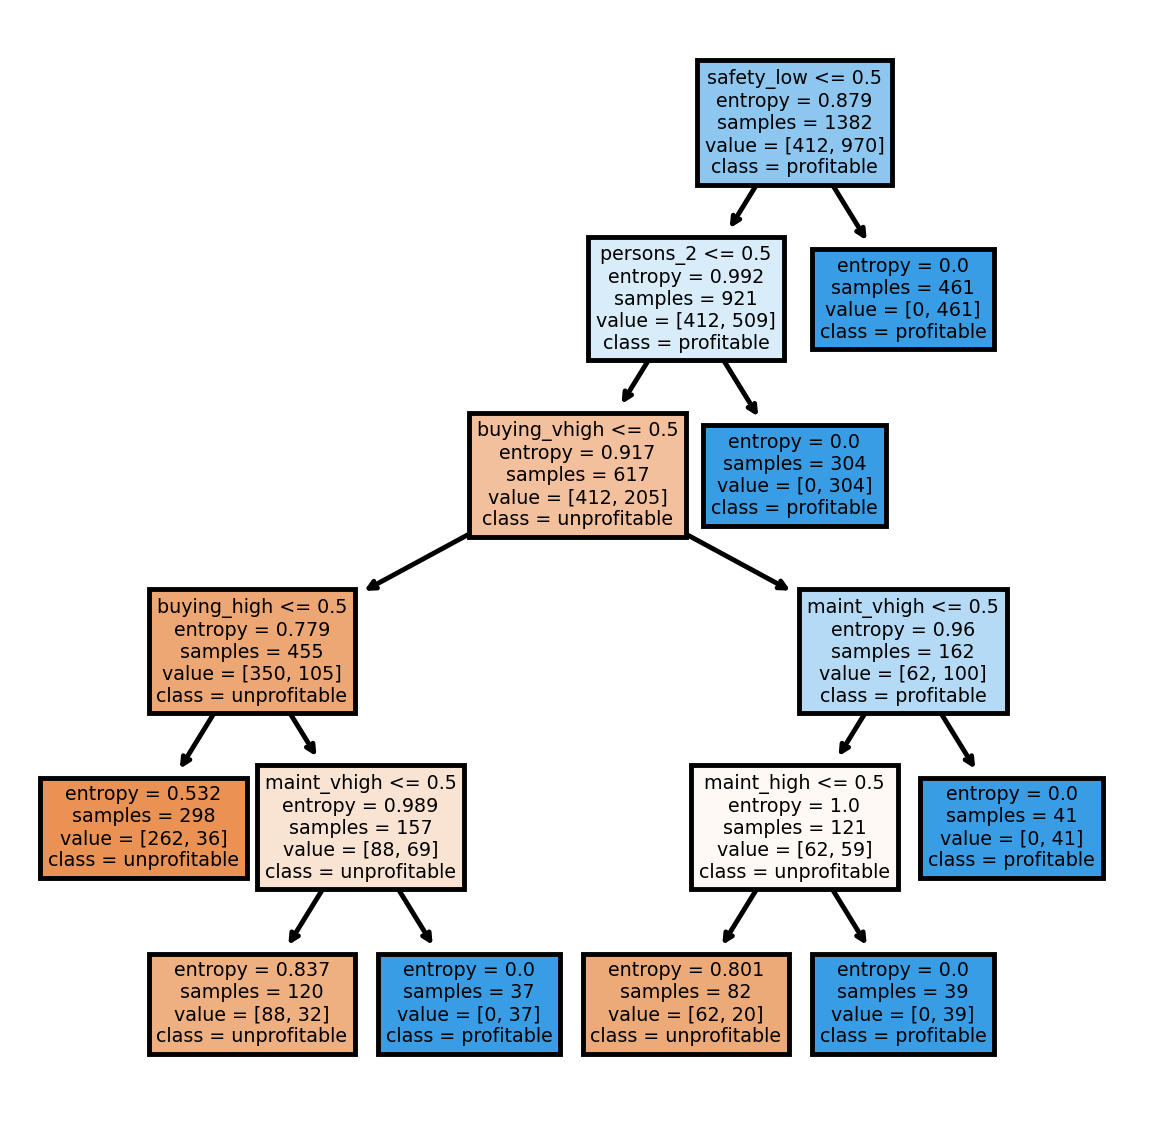

In [109]:
features_gain = X_test.keys().to_list()
fig_gain = visualizeTree(clf_gain,features_gain)

In [110]:
fig_gain.savefig('gain_tree.png')

Features: ['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'persons_2', 'persons_4', 'persons_more', 'safety_high', 'safety_low', 'safety_med']
Labels: ['unprofitable', 'profitable']


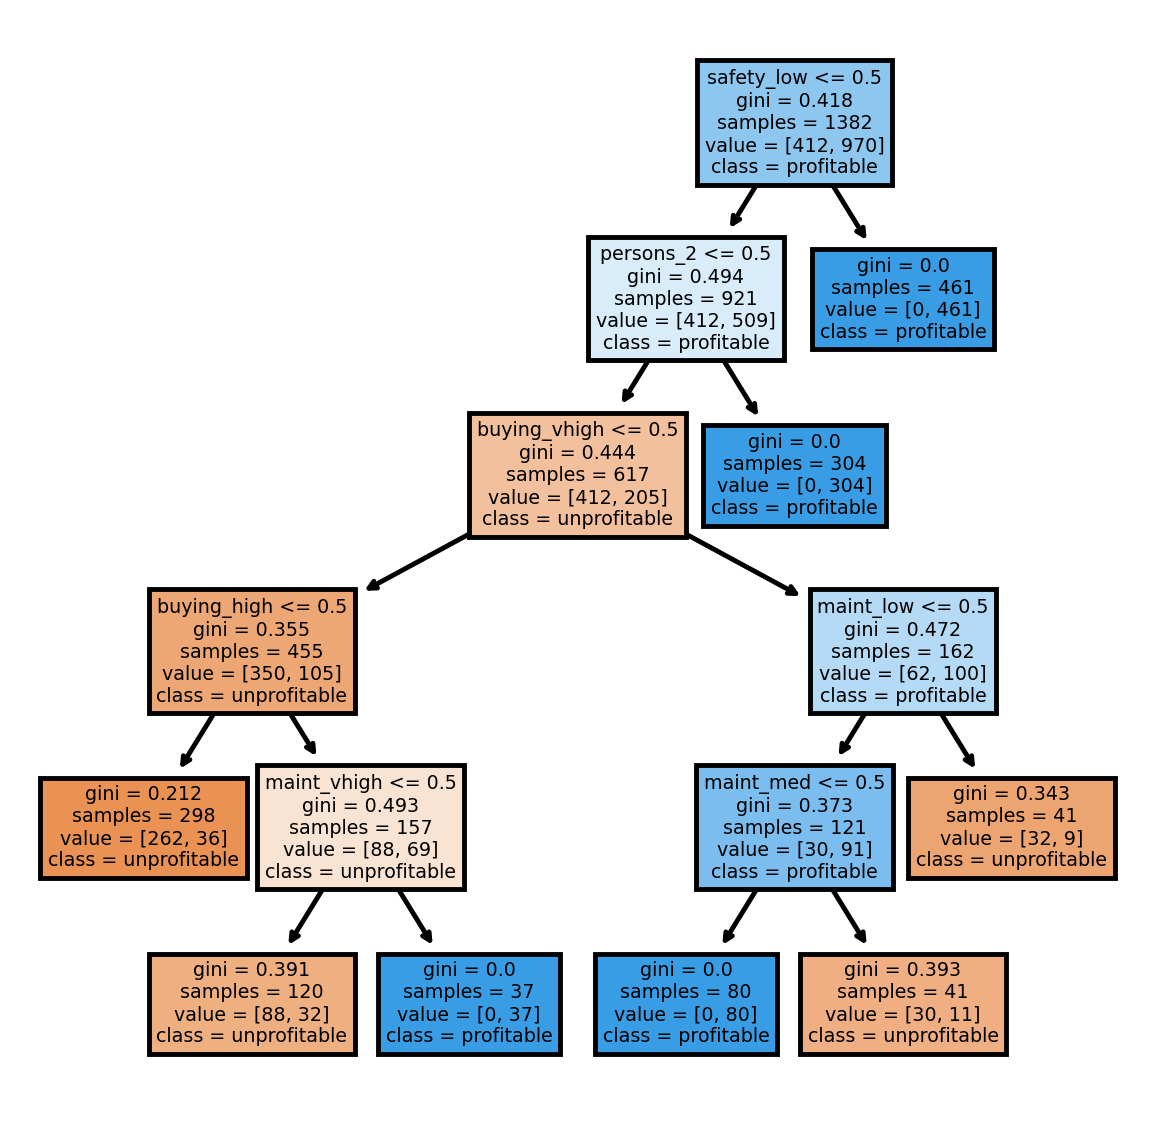

In [111]:
features_gini = X_test.keys().to_list()
fig_gini = visualizeTree(clf_gini,features_gini)

In [112]:
fig_gini.savefig('gini_tree.png')